## Import Dependency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition

In [2]:
df = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression\playground-series-s4e9\train.csv")

df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


- Target: `price`

|Feature|Type|Feature|Type|Feature|Type|Feature|Type|
|--------|------|--------|------|--------|------|--------|------|
|`id`|Alpha Numeric|`brand`|Categorical - Nominal|`model`|Categorical - Nominal|`model_year`|Numeric - Discrete|
|`milage`|Numeric - Continuous|`fuel_type`|Categorical - Nominal|`engine`|Categorical - Nominal|`transmission`|Categorical - Nominal|
|`ext_col`|Categorical - Nominal|`int_col`|Categorical - Nominal|`accident`|Categorical - Ordinal|`clean_title`|Categorical - Nominal|

In [4]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


## Data Cleaning

In [5]:
missing_values = df.isna().sum()

for column, values in missing_values.items():
    if values > 0:
        print(f"{column}: {values}")

fuel_type: 5083
accident: 2452
clean_title: 21419


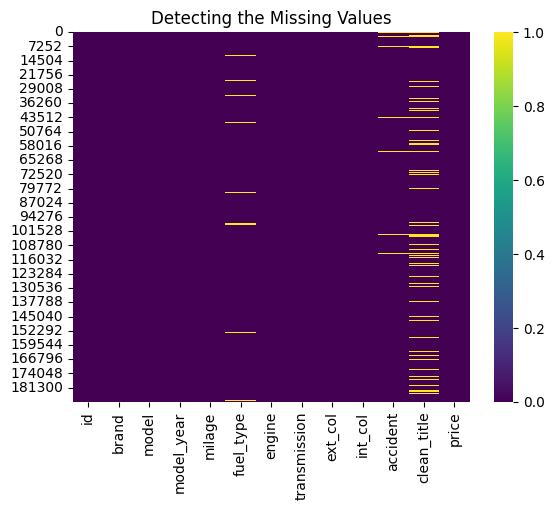

In [6]:
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Detecting the Missing Values')

plt.show()

### Duplicated Value

In [7]:
df['id'].duplicated().sum()

0

In [8]:
df.drop(columns='id', inplace=True)

The `id` column is exactly same as the index, therefore we will drop right away.

### Missing Values

#### fuel_type

In [9]:
df[df['fuel_type'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188368,Ford,Mustang Mach-E Premium,2022,2058,NaN,Standard Range Battery,Automatic CVT,Red,Black,None reported,NaN,27785
188455,Ford,Mustang Mach-E GT,2022,8000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,White,None reported,Yes,115000
188462,Ford,Mustang Mach-E GT,2023,9000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,Black,None reported,Yes,85000
188484,Ford,Model X P100D,2018,52000,NaN,534.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Black,None reported,Yes,45000


In [10]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

We see there are some values that we need to look over which are '-' and 'not supported' along with the missing values. There seems like a pattern where all the missing values are an electric cars.

In [11]:
df[df['brand'] == 'Tesla'] # Tesla don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188231,Tesla,Model 3 Performance,2021,23250,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,White,None reported,Yes,29000
188302,Tesla,Model Y Performance,2022,13500,NaN,455.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,70000
188339,Tesla,Model S 100D,2018,28333,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,Black,At least 1 accident or damage reported,Yes,49999
188380,Tesla,Model S Performance,2021,10500,Gasoline,778.0HP Electric Motor Electric Fuel System,8-Speed A/T,Black,Beige,None reported,Yes,98900


In [12]:
df[df['brand'] == 'Rivian'] # Rivian also don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
44,Rivian,R1S Adventure Package,2023,7000,Gasoline,835.0HP Electric Motor Electric Fuel System,8-Speed A/T,Green,Black,None reported,Yes,145000
902,Rivian,R1S Adventure Package,2023,8400,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,93000
982,Rivian,R1S Adventure Package,2021,28200,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Silver,White,None reported,Yes,29600
1561,Rivian,R1S Adventure Package,2023,12500,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,Black,None reported,Yes,19395
2694,Rivian,R1S Adventure Package,2023,17500,–,–,A/T,Gray,Black,None reported,Yes,133500
...,...,...,...,...,...,...,...,...,...,...,...,...
187913,Rivian,R1S Adventure Package,2023,2700,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Black,White,None reported,Yes,92500
188025,Rivian,R1S Launch Edition,2022,8681,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Green,None reported,Yes,87500
188112,Rivian,R1S Adventure Package,2023,2000,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Black,Gray,None reported,Yes,89000
188248,Rivian,R1S Launch Edition,2022,2525,Gasoline,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Orange,White,None reported,Yes,81500


In [13]:
df[df['brand'] == 'Lucid'] # Lucid also don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2256,Lucid,Air Grand Touring,2007,156875,Gasoline,262.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Red,Black,None reported,Yes,9499
5141,Lucid,Air Grand Touring,2022,51000,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,120990
6272,Lucid,Air Grand Touring,2022,11111,Gasoline,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,63000
9523,Lucid,Air Grand Touring,2023,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,53900
10153,Lucid,Air Grand Touring,2021,14550,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,33333
...,...,...,...,...,...,...,...,...,...,...,...,...
179328,Lucid,Air Grand Touring,2022,4786,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,90000
179556,Lucid,Air Grand Touring,2021,33012,NaN,355.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Beige,None reported,Yes,42000
180801,Lucid,Air Grand Touring,2023,7900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,–,None reported,Yes,82500
181188,Lucid,Air Grand Touring,2011,52500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Beige,None reported,Yes,28000


In [14]:
electric_brands = ['Tesla', 'Lucid', 'Rivian']

# Fill in the 'fuel_type' with 'Electric' if the brand is in the electric_brands list.
df.loc[df['brand'].isin(electric_brands), 'fuel_type'] = 'Electric'

# Fill in missing values or update to the correct value using the 'engine' column.
df.loc[((df['engine'].str.contains('Electric|Battery'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Electric'
df.loc[((df['engine'].str.contains('Hybrid'))&(df['fuel_type'].isna()|(df['fuel_type']=='–'))), 'fuel_type'] = 'Hybrid'
df.loc[((df['engine'].str.contains('Gasoline'))&(df['fuel_type'].isna()|(df['fuel_type']=='not supported')|(df['fuel_type']=='–'))), 'fuel_type'] = 'Gasoline'
df.loc[((df['engine'].str.contains('Diesel'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Diesel'
df.loc[((df['engine'].str.contains('Hydrogen'))&(df['fuel_type']=='not supported')), 'fuel_type'] = 'Hydrogen' # Toyota has a Hydrogen Car!

# Fill in missing values or update to the correct value using the 'model' column.
df.loc[((df['model'].str.contains('EV|Electric'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Electric' # EV = Electric Vehicle

# Rest are all filled with the value 'Gasoline'ArithmeticError
df.loc[((df['fuel_type'].isna())|(df['fuel_type'].str.contains('not supported|–'))), 'fuel_type'] = 'Gasoline'

To simplify the process, I began by filling in missing values for brands that exclusively produce electric cars. Next, I checked the `engine` field and, if it contained terms such as "electric," "battery," "hybrid," "gasoline," "diesel," or "hydrogen," I updated or filled in the corresponding fuel type. If these keywords were missing from the `engine` field, I used the `model` values to fill in the fuel type. Finally, any remaining missing values, including those marked as '-', or 'not supported,' were filled with 'Gasoline,' as gasoline-powered cars are the most common.

In [15]:
df['fuel_type'].isna().sum()

0

#### accident

In [16]:
df[df['accident'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
87,RAM,2500 Big Horn,2012,95400,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6-Speed A/T,Black,Black,NaN,NaN,27899
134,Jeep,Gladiator Sport,2021,61341,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Firecracker Red Clearcoat,Black,NaN,NaN,32455
164,Acura,RDX w/A-Spec Package,2023,39517,Gasoline,2.0 Liter DOHC Turbo,Automatic,Gray,Black,NaN,NaN,29645
333,Mercedes-Benz,SLK-Class SLK320,2001,170000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Beige,NaN,NaN,6000
361,RAM,2500 SLT,2016,69600,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,NaN,NaN,35900
...,...,...,...,...,...,...,...,...,...,...,...,...
187885,Chevrolet,Corvette Stingray w/2LT,2022,16100,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Blue,NaN,NaN,36000
188140,Chevrolet,Silverado 1500 RST,2021,40929,Gasoline,5.3L V8 16V GDI OHV,10-Speed Automatic,Shadow Gray Metallic,Jet Black,NaN,NaN,41885
188425,Volvo,XC90 T6 Momentum,2016,25000,Gasoline,316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,NaN,NaN,52500
188505,Ford,F-150 XLT,2020,49899,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,Automatic,Gray,Black,NaN,NaN,52645


In [17]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [18]:
df['accident'].fillna('Unknown', inplace=True)

Since we don't know if there was an accident or not, we will fill in the value with 'Unknown'.

#### clean_title

In [19]:
df[df['clean_title'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,Electric,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,None reported,NaN,92500
...,...,...,...,...,...,...,...,...,...,...,...,...
188507,Chevrolet,Corvette Stingray w/3LT,2023,3053,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,Unknown,NaN,61999
188511,Land,Rover Range Rover Velar P380 SE R-Dynamic,2022,15198,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Firenze Red,Ebony,None reported,NaN,23739
188513,Lexus,GS 350 F Sport,2022,82046,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Caviar,Black,None reported,NaN,48990
188520,Mercedes-Benz,GLC 300 GLC 300,2022,18031,Gasoline,2.0 Liter Turbo,Automatic,White,Black,None reported,NaN,39998


In [20]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [21]:
df['clean_title'].fillna('Unknown', inplace=True)

Same thing, we don't know if the car has a clean title or not, we will fill in the value with 'Unknown'.

In [22]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

### Validating Values

#### Numeric Data

In [24]:
df['model_year'].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992], dtype=int64)

<Axes: >

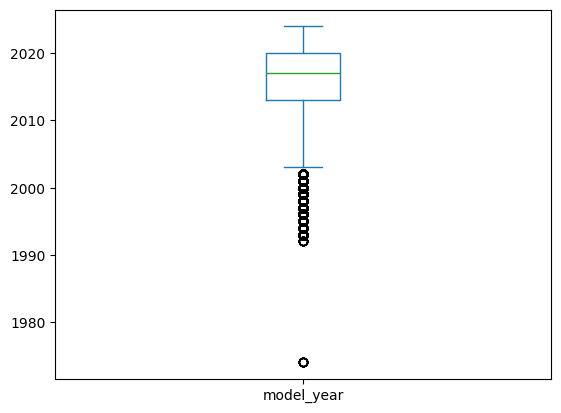

In [25]:
df['model_year'].plot.box()

In [26]:
df['model_year'].min()

1974

In [27]:
df[df['model_year']==1974]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
8173,Dodge,Challenger R/T Scat Pack,1974,49000,Gasoline,–,5-Speed M/T,Green,Gray,None reported,Yes,29900
38565,Ford,Bronco,1974,38012,Gasoline,–,–,Thunder Gray,Dark Gray,None reported,Yes,84620
47488,Ford,Bronco,1974,109762,Gasoline,–,–,Tempest,–,Unknown,Unknown,13046
47837,Ford,Bronco XLT,1974,5856,Gasoline,–,6-Speed M/T,Black,Black,None reported,Yes,115000
55169,Ford,Thunderbird Deluxe,1974,174678,Gasoline,280.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Beige,None reported,Yes,29998
60702,Porsche,911 Carrera 4S,1974,102750,Gasoline,–,A/T,Gray,Gray,None reported,Yes,29000
71389,Ford,Bronco XLT,1974,54323,Gasoline,–,4-Speed A/T,Blue,Beige,None reported,Yes,23500
121193,Ford,Bronco,1974,7900,Gasoline,–,–,Gray,Gray,None reported,Yes,197499
127656,Lincoln,Town Car Base,1974,152000,Gasoline,–,A/T,White,Beige,None reported,Yes,9999
133985,Jaguar,F-PACE S,1974,58356,Gasoline,–,Automatic,Black,Ebony,None reported,Unknown,115998


In [28]:
len(df[df['model_year']==1974])

12

The outlier in the `model_year` is 1974, with 12 records in the dataset. These records are missing both the `engine` and `transmission` values, which will require further investigation.

In [26]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
